In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import database

df = pd.read_csv('customer churn.csv')
pd.set_option('display.max_columns', None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# droping unwanted column

df.drop('customerID', axis=1, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [5]:
# handling empty string ' '

for i in df.columns:
    if len(df[df[i] == ' '].index) > 0:
        print(i)
        print(df[df[i] == ' '].index)
        print()


TotalCharges
Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')



In [6]:
# df[df['TotalCharges'] == ' ']['TotalCharges'].values

df.replace(df[df['TotalCharges'] == ' ']['TotalCharges'].values, 0, inplace=True)

In [7]:
# changing datatype

df['TotalCharges'] = df['TotalCharges'].astype('float64')

In [8]:
# checking null values

df.columns.isnull()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [9]:
# numerical features

df.select_dtypes(exclude='O').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [10]:
# categorical features

df.select_dtypes('O').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#### sort columns name from small to large

df.sort_index(axis=1, inplace=False , ascending=False)

#### sorting list
x = [i.lower() for i in list(df.columns)]
x.sort()
x

####  change columns to lowercase
df.columns.str.lower()

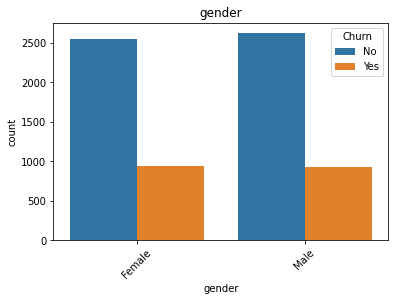

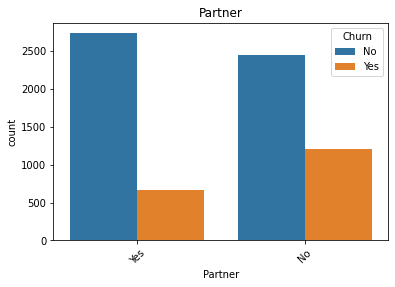

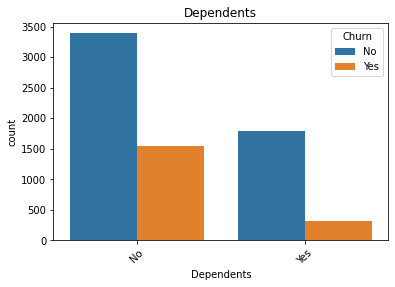

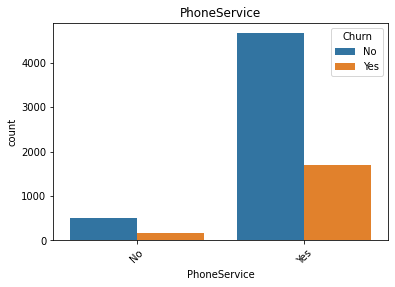

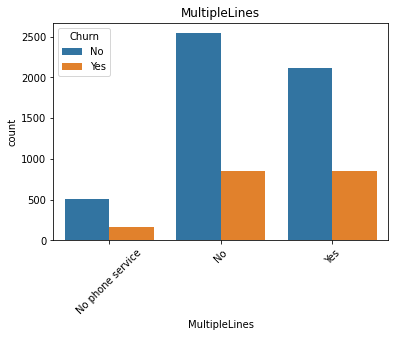

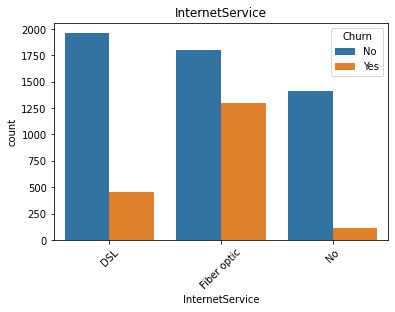

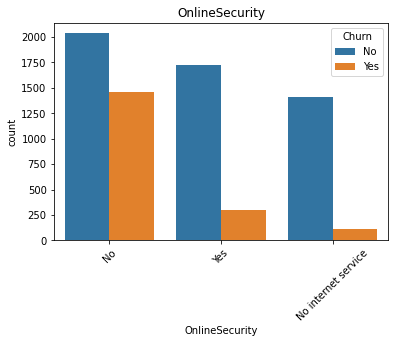

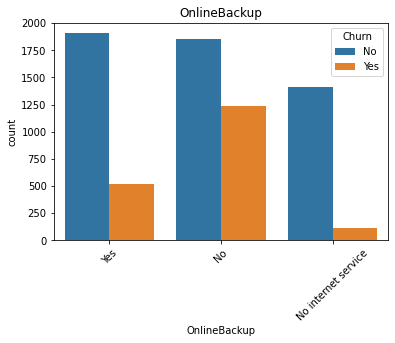

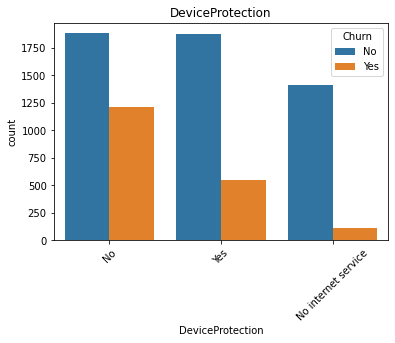

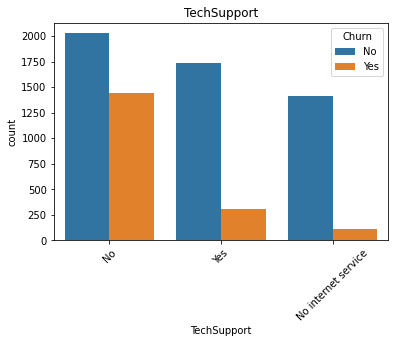

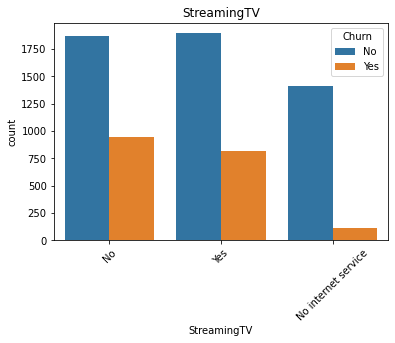

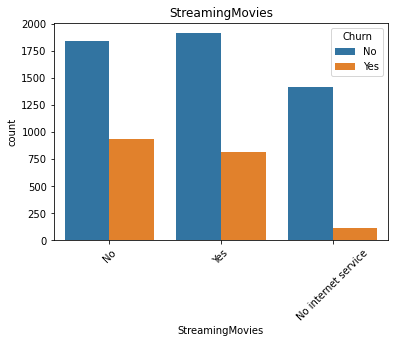

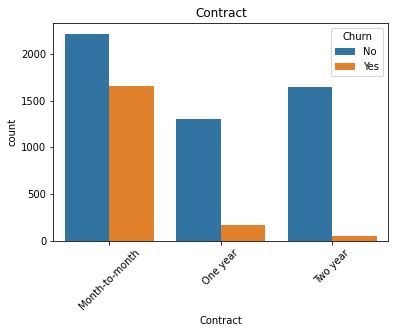

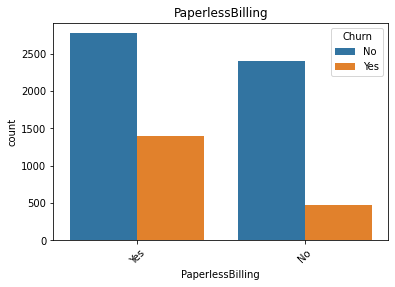

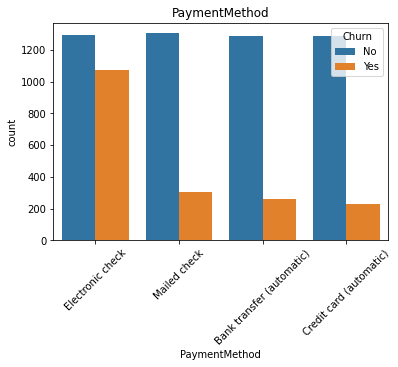

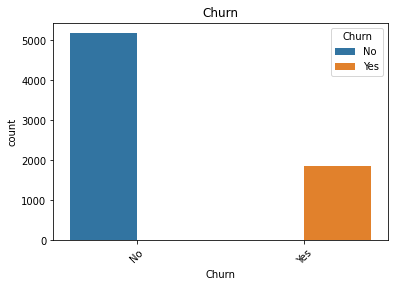

In [12]:
for feature in df.select_dtypes('O').columns:
    sns.countplot(x= feature, data= df, hue='Churn')
    plt.title(feature)
    plt.xticks(rotation=45)
    plt.show()

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

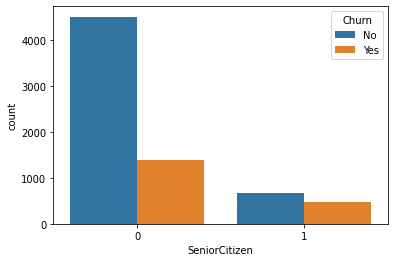

In [13]:
sns.countplot(x= 'SeniorCitizen', data= df, hue='Churn')

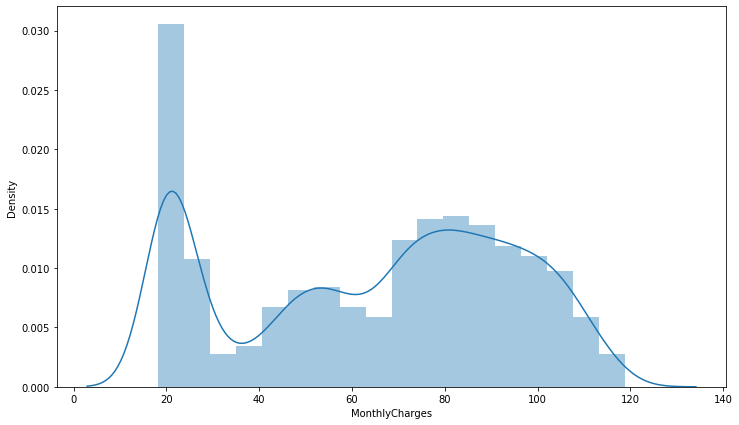

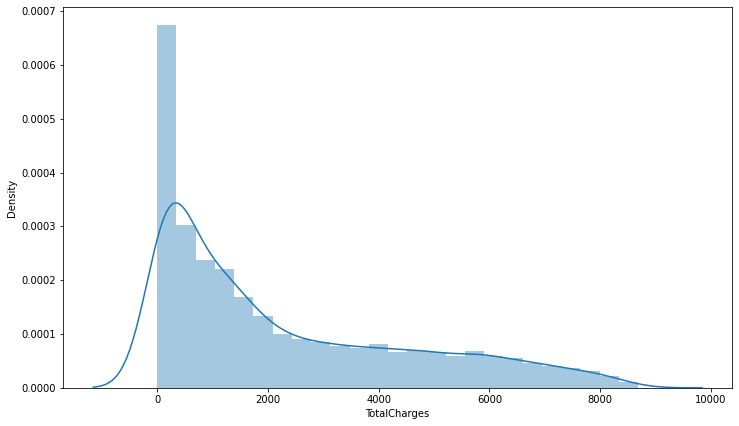

In [14]:
plt.figure(figsize=(12,7))
sns.distplot(df['MonthlyCharges'])
plt.show()

plt.figure(figsize=(12,7))
sns.distplot(df['TotalCharges'])
plt.show()

In [15]:
df['Churn'] = df['Churn'].map({'No':0, 'Yes':1})

In [16]:
binary_feature = []
for feature in df.select_dtypes('O').columns :
    if feature != 'Churn':
        
        if df[feature].nunique() == 2:
            print(feature)
            binary_feature.append(feature)

binary_feature


gender
Partner
Dependents
PhoneService
PaperlessBilling


['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

In [17]:
dummies_1 = pd.get_dummies(data=df ,columns=binary_feature, drop_first=True)

In [18]:
dummies = pd.get_dummies(dummies_1)

In [19]:
dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,PaperlessBilling_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1
7039,0,72,103.20,7362.90,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0
7040,0,11,29.60,346.45,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0
7041,1,4,74.40,306.60,1,1,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1


In [20]:
x = dummies.drop('Churn', axis=1)
y = dummies['Churn']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [22]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 40), (1409, 40), (5634,), (1409,))

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

In [24]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
train = sc_train.fit_transform(X_train)

test = sc_train.transform(X_test)

In [28]:
models = [svm.SVC(kernel='linear'), 
         svm.SVC(kernel='rbf'), 
         LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200), 
         AdaBoostClassifier(n_estimators=200), 
         GradientBoostingClassifier(n_estimators=200), 
         KNeighborsClassifier(), 
         XGBClassifier(n_estimators=200)]

In [29]:
Kfold_scorer = pd.DataFrame()

classifier = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
              'DecisionTreeClassifier', 'RandomForestClassifier', 
              'AdaBoostClassifier', 'GradientBoostingClassifier', 
              'KNeighborsClassifier', 'XGBClassifier', 'VotingClassifier']

model = [svm.SVC(kernel='linear'), 
         svm.SVC(kernel='rbf'), 
         LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200), 
         AdaBoostClassifier(n_estimators=200), 
         GradientBoostingClassifier(n_estimators=200), 
         KNeighborsClassifier(), 
         XGBClassifier(n_estimators=200),
         VotingClassifier(estimators=[(classifier[0], models[0]), (classifier[1], models[1]),
         (classifier[2],models[2]),  (classifier[3], models[3]), (classifier[4], models[4]),
        (classifier[5],models[5]),(classifier[6], models[6]), (classifier[7], models[7])], n_jobs=-1)]

cv = KFold(n_splits=5, shuffle=True)
j = 0
for i in model:
    model = i
    Kfold_scorer[classifier[j]] = (cross_val_score(model, X_train, y_train.ravel(), cv= cv, n_jobs= -1))
    j+=1

In [30]:
mean = pd.DataFrame(Kfold_scorer.mean(), index= classifier)
KFold_Score = pd.concat([Kfold_scorer,mean.T])
KFold_Score.index=['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_Score.T.sort_values(by=['Mean'], ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
LogisticRegression,0.810115,0.803017,0.789707,0.795918,0.833037,0.806359
VotingClassifier,0.797693,0.824312,0.815439,0.785271,0.807282,0.806000
AdaBoostClassifier,0.811003,0.800355,0.804791,0.816327,0.793073,0.805110
GradientBoostingClassifier,0.797693,0.796806,0.798580,0.801242,0.822380,0.803340
Linear SVM,0.810115,0.787045,0.787045,0.802130,0.812611,0.799789
RandomForestClassifier,0.811003,0.804791,0.794144,0.776398,0.786856,0.794638
XGBClassifier,0.779947,0.763975,0.777285,0.784383,0.796625,0.780443
KNeighborsClassifier,0.762201,0.767524,0.769299,0.773736,0.772647,0.769081
Radial SVM,0.760426,0.742680,0.732919,0.724933,0.735346,0.739261
DecisionTreeClassifier,0.728483,0.724046,0.733807,0.733807,0.748668,0.733762


In [32]:
Kfold_scorer_scaled = pd.DataFrame()

classifier = ['Linear SVM', 'Radial SVM', 'LogisticRegression', 
              'DecisionTreeClassifier', 'RandomForestClassifier', 
              'AdaBoostClassifier', 'GradientBoostingClassifier', 
              'KNeighborsClassifier', 'XGBClassifier', 'VotingClassifier']

model = [svm.SVC(kernel='linear'), 
         svm.SVC(kernel='rbf'), 
         LogisticRegression(solver = 'liblinear'),
         DecisionTreeClassifier(), 
         RandomForestClassifier(n_estimators=200), 
         AdaBoostClassifier(n_estimators=200), 
         GradientBoostingClassifier(n_estimators=200), 
         KNeighborsClassifier(), 
         XGBClassifier(n_estimators=200),
         VotingClassifier(estimators=[(classifier[0], models[0]), (classifier[1], models[1]),
         (classifier[2],models[2]),  (classifier[3], models[3]), (classifier[4], models[4]),
        (classifier[5],models[5]),(classifier[6], models[6]), (classifier[7], models[7])], n_jobs=-1)]

cv = KFold(n_splits=5, shuffle=True)
j = 0
for i in model:
    model = i
    Kfold_scorer_scaled[classifier[j]] = (cross_val_score(model, train, y_train.ravel(), cv= cv, n_jobs= -1))
    j+=1

In [44]:
mean_1 = pd.DataFrame(Kfold_scorer_scaled.mean(), index=classifier)
KFold_scorer_scaled = pd.concat([Kfold_scorer_scaled, mean_1.T])
KFold_scorer_scaled.index = ['Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Mean']
KFold_scorer_scaled.T.sort_values('Mean', ascending = False)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean
LogisticRegression,0.810115,0.804791,0.818988,0.795031,0.817940,0.809373
VotingClassifier,0.794144,0.807453,0.809228,0.821650,0.807282,0.807952
AdaBoostClassifier,0.808341,0.818988,0.803904,0.806566,0.801066,0.807773
GradientBoostingClassifier,0.808341,0.795031,0.813665,0.809228,0.800178,0.805288
Linear SVM,0.814552,0.786158,0.797693,0.811890,0.809947,0.804048
Radial SVM,0.799468,0.800355,0.809228,0.777285,0.819716,0.801210
RandomForestClassifier,0.803904,0.784383,0.790594,0.786158,0.803730,0.793754
XGBClassifier,0.777285,0.773736,0.790594,0.775510,0.810835,0.785592
KNeighborsClassifier,0.760426,0.764862,0.767524,0.774623,0.755773,0.764642
DecisionTreeClassifier,0.753327,0.729370,0.719610,0.725821,0.732682,0.732162


In [34]:
def train_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    on_test_set = model.predict(X_test)
    
    test_score = model.score(X_test,y_test )
    
    print(model.__class__.__name__)
    print('---test_score=',  test_score)
    print('\n')

In [45]:
for i in models:
    train_model(i, train, test, y_train, y_test)
    
vc = VotingClassifier(estimators=[(classifier[0], models[0]), (classifier[1], models[1]),
         (classifier[2],models[2]),  (classifier[3], models[3]), (classifier[4], models[4]),
        (classifier[5],models[5]),(classifier[6], models[6]), (classifier[7], models[7])], n_jobs=-1)    
train_model(vc, X_train, X_test, y_train, y_test)


SVC
---test_score= 0.7771469127040455


SVC
---test_score= 0.7849538679914834


LogisticRegression
---test_score= 0.7892122072391767


DecisionTreeClassifier
---test_score= 0.7267565649396736


RandomForestClassifier
---test_score= 0.7778566359119943


AdaBoostClassifier
---test_score= 0.7885024840312278


GradientBoostingClassifier
---test_score= 0.7799858055358411


KNeighborsClassifier
---test_score= 0.7310149041873669


[21:52:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
---test_score= 0.7714691270404542


VotingClassifier
---test_score= 0.7863733144073811




In [46]:
for i in models:
    train_model(i, X_train, X_test, y_train, y_test)

SVC
---test_score= 0.7771469127040455


SVC
---test_score= 0.71611071682044


LogisticRegression
---test_score= 0.78708303761533


DecisionTreeClassifier
---test_score= 0.7267565649396736


RandomForestClassifier
---test_score= 0.7757274662881476


AdaBoostClassifier
---test_score= 0.7885024840312278


GradientBoostingClassifier
---test_score= 0.7799858055358411


KNeighborsClassifier
---test_score= 0.7558552164655784


[22:05:17] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
---test_score= 0.7721788502484032




In [51]:
def tr(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    on_test_set = model.predict(X_test)
    
    test_score = model.score(X_test,y_test )
    
#     print(model.__class__.__name__)
#     print('---test_score=',  test_score)
#     print('\n')
    
    return test_score

In [54]:
score = []
j = 0
for i in models:
    x = tr(i, train, test, y_train, y_test)
    score.append(x)
    

[22:10:22] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
scoress = dict(zip(classifier, score))

In [62]:
{k:v for k,v in sorted(scoress.items(), key= lambda x : x[1], reverse=True)}

{'LogisticRegression': 0.7892122072391767,
 'AdaBoostClassifier': 0.7885024840312278,
 'Radial SVM': 0.7849538679914834,
 'GradientBoostingClassifier': 0.7799858055358411,
 'Linear SVM': 0.7771469127040455,
 'RandomForestClassifier': 0.7743080198722498,
 'XGBClassifier': 0.7714691270404542,
 'KNeighborsClassifier': 0.7310149041873669,
 'DecisionTreeClassifier': 0.7253371185237757}